In [ ]:
# Car price prediction from Car Dekho DataSet

In [575]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [576]:
## Lets import required files 

In [577]:
from google.colab import files
files.upload()

Saving car data.csv to car data (1).csv
Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (1).csv
Saving Car details v3.csv to Car details v3 (1).csv


{'CAR DETAILS FROM CAR DEKHO.csv': b'name,year,selling_price,km_driven,fuel,seller_type,transmission,owner\r\nMaruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner\r\nMaruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner\r\nHyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner\r\nDatsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner\r\nHonda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner\r\nMaruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner\r\nHyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner\r\nTata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner\r\nHyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner\r\nMaruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner\r\nChevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,Manual,First Owner\r\n

In [645]:
df=pd.read_csv('car data.csv')

In [646]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [647]:
df.shape

(301, 9)

In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [649]:
# 5 NUMERIC COLUMNS ARE PRESENT

In [650]:
# LETS UNDERSTAND CATEGORIAL FEATURES

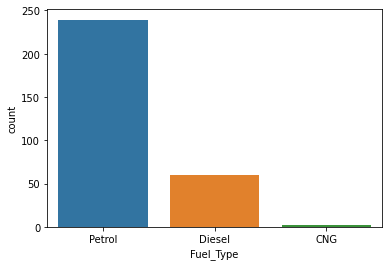

In [651]:
sns.countplot(x=df.Fuel_Type)

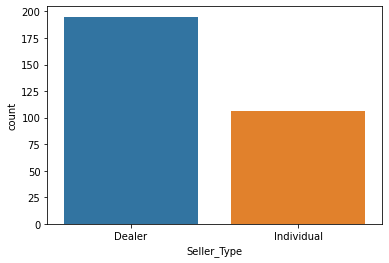

In [652]:
sns.countplot(x=df['Seller_Type'])

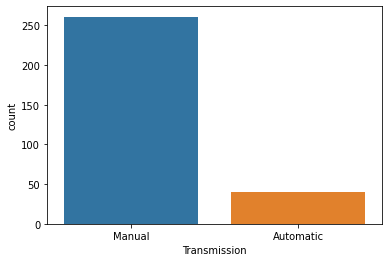

In [653]:
sns.countplot(x=df.Transmission)

In [654]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [655]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


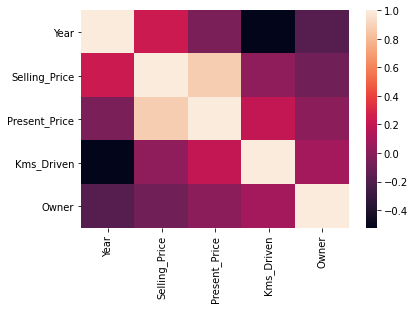

In [656]:
sns.heatmap(df.corr())

In [657]:
#LET US MAKE ONE MORE COLUMN FOR LIFE OF CAR AS 'YEARS_OLD' BY TAKING CURRENT YEAR AS 2020.

In [658]:
df['yrs_old']=2020-df['Year']

In [659]:
df.shape

(301, 10)

In [660]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [661]:
df.Owner.unique()

array([0, 1, 3])

In [662]:
#LETS DROP YEAR AND CAR NAME COLUMNS BECAUSE WE HAVE ALREADY TAKEN NEW COLUMN FOR YEAR AND CAR NAMES HAVE MANY UNIQUE VALUES SO WE AN DROP IT TOO.

In [663]:
df=df.drop('Year',axis=1)

In [664]:
df=df.drop('Car_Name',axis=1)

In [665]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,yrs_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [666]:
df.shape

(301, 8)

In [667]:
#NOW LETS CONVERT CATEGORICAL FEATURES INTO NUMERIC VALUES

In [668]:
df=pd.get_dummies(df,drop_first=True)

In [669]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,yrs_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [670]:
#SELLING PRICE IS OUR DEPENDABLE VARIABLE/TARGET COLUMN. LETS STORE IT IN Y.
#AND REST OF VALUES IN X

In [671]:
x=df.drop('Selling_Price',axis=1)

In [672]:
x.shape

(301, 8)

In [673]:
y=df['Selling_Price']

In [674]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [675]:
#NOW LETS BUILD OUR ML MODEL BASED ON LINEAR REGRESSION.

In [676]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [677]:
lr=LinearRegression()

In [678]:
x.shape

(301, 8)

In [679]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [680]:
x_train.shape

(240, 8)

In [681]:
x_test.shape

(61, 8)

In [682]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [683]:
y_pred=lr.predict(x_test)

In [684]:
x_train.shape

(240, 8)

In [685]:
x_test.shape

(61, 8)

In [686]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [687]:
y_pred

array([ 7.51749959, -0.38136   ,  4.2559471 ,  9.00719207, 14.4269339 ,
        4.87144495,  3.50800415,  1.44729345,  5.3451756 ,  4.61435641,
        2.26758534,  1.6209573 ,  5.0502457 ,  7.5592941 ,  8.60637169,
       13.98391877,  7.32792948,  4.23074458, -0.43329109,  2.36959252,
        4.98862734,  3.82566592,  6.43249291,  8.02059313, -1.89494718,
        1.92952344, -0.82194725,  0.82000278,  0.0287008 ,  7.09763522,
        3.56594643,  7.42982762,  0.72122573,  7.93570184,  3.51526022,
        1.8051379 ,  5.54534144,  6.9878273 , -2.62961763,  9.08622868,
        9.21468651, 20.02249841,  4.37997532,  3.85349481,  6.66353853,
        9.8481939 ,  0.13251979,  1.68098927,  5.0992548 ,  7.35232556,
        8.07177253,  4.17227139,  4.84915569, 20.36876087,  1.7479962 ,
        1.30291959,  0.30682078,  1.98321103,  3.37503799,  0.87901548,
        3.52730876])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


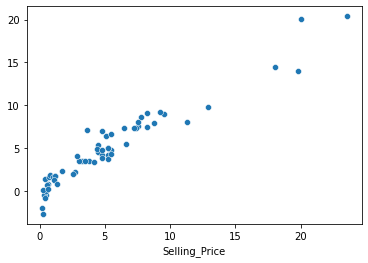

In [688]:
sns.scatterplot(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


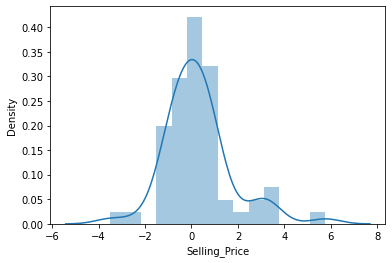

In [689]:
sns.distplot(y_test-y_pred)

In [690]:
r2_score(y_test,y_pred)

0.9144342972228519

In [691]:
import pickle

In [692]:
file=open('car.pkl','wb')
pickle.dump(lr,file)

In [693]:
ls

'car data (1).csv'                    'Car details v3 (1).csv'
'car data.csv'                        'Car details v3.csv'
'CAR DETAILS FROM CAR DEKHO (1).csv'   car.pkl
'CAR DETAILS FROM CAR DEKHO.csv'       sample_data/
